In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 26_​​Medical Cost Insurance Analysis By Alfin Bahru Rahmika Umar\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (1338, 7)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Simpan salinan data asli untuk perbandingan
df_original = df.copy()
print("=== Data Asli ===")
print("Shape:", df.shape)
print("Missing values per kolom:\n", df.isnull().sum())
print("Jumlah duplikat:", df.duplicated().sum())
# --- Menghapus Duplikat dan Nilai Kosong ---
df_cleaned = df.drop_duplicates().dropna()


=== Data Asli ===
Shape: (1338, 7)
Missing values per kolom:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Jumlah duplikat: 1


In [7]:
# --- Deteksi Outlier dengan Metode IQR ---
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in ['age', 'bmi', 'charges']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print("\n=== Setelah Cleaning ===")
print("Shape:", df_cleaned.shape)


=== Setelah Cleaning ===
Shape: (1190, 7)


Text(0.5, 1.0, 'Box Plot Charges (Data Asli)')

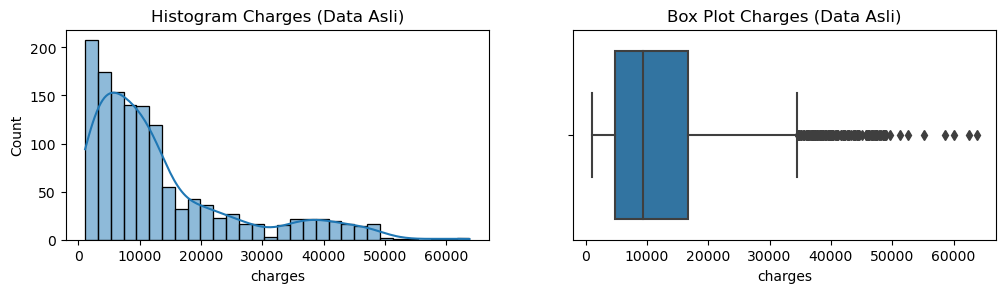

In [8]:
# --- Visualisasi Histogram dan Box Plot untuk kolom 'charges' ---
plt.figure(figsize=(12, 6))

# Histogram dan Box Plot data asli
plt.subplot(2, 2, 1)
sns.histplot(df_original['charges'], kde=True)
plt.title('Histogram Charges (Data Asli)')

plt.subplot(2, 2, 2)
sns.boxplot(x=df_original['charges'])
plt.title('Box Plot Charges (Data Asli)')

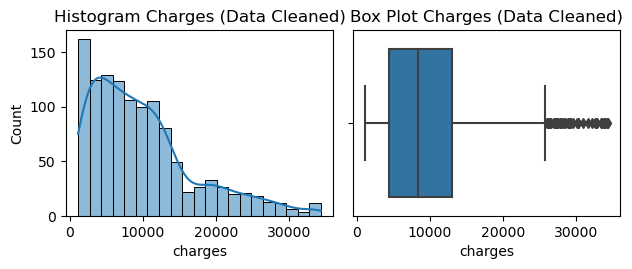

In [9]:
# Histogram dan Box Plot data setelah cleaning
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned['charges'], kde=True)
plt.title('Histogram Charges (Data Cleaned)')

plt.subplot(2, 2, 4)
sns.boxplot(x=df_cleaned['charges'])
plt.title('Box Plot Charges (Data Cleaned)')

plt.tight_layout()
plt.show()

In [10]:
# --- Perbandingan Statistik Deskriptif ---
print("\nStatistik Deskriptif (Data Asli):")
print(df_original.describe())
print("\nStatistik Deskriptif (Data Cleaned):")
print(df_cleaned.describe())


Statistik Deskriptif (Data Asli):
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Statistik Deskriptif (Data Cleaned):
               age          bmi     children       charges
count  1190.000000  1190.000000  1190.000000   1190.000000
mean     39.027731    29.993147     1.088235   9908.046614
std      14.050554     5.873027     1.216558   7186.405555
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.800000     0.000000   4418.591062
50%      39.000000    29.700000     1.0000

In [11]:
# Menyimpan dataset yang telah dibersihkan
df_cleaned.to_csv('insurance-cleaned.csv', index=False)

In [12]:
# Reset index dan tambahkan kolom ID (dimulai dari 1)
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned['ID'] = df_cleaned.index + 1

# --- Perhitungan Metrik ---
total_unique_id = df_cleaned['ID'].nunique()
total_id = df_cleaned['ID'].count()
total_charges = df_cleaned['charges'].sum()
highest_charges = df_cleaned['charges'].max()
average_charges = df_cleaned['charges'].mean()
average_bmi = df_cleaned['bmi'].mean()
average_age = df_cleaned['age'].mean()
print("Total Unique ID:", total_unique_id)
print("Total ID:", total_id)
print("Total Charges:", total_charges)
print("Highest Charges:", highest_charges)
print("Average Charges:", average_charges)
print("Average BMI:", average_bmi)
print("Average Age:", average_age)

Total Unique ID: 1190
Total ID: 1190
Total Charges: 11790575.470149001
Highest Charges: 34303.1672
Average Charges: 9908.046613570588
Average BMI: 29.99314705882353
Average Age: 39.02773109243697


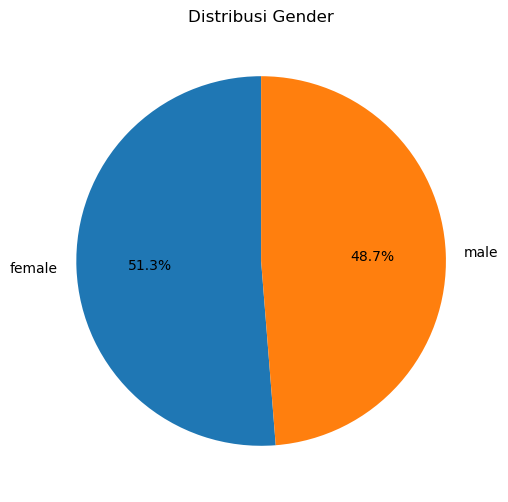

In [13]:
# --- Pie Chart: Persentase Berdasarkan Gender ---
plt.figure(figsize=(8,6))
gender_counts = df_cleaned['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Gender')
plt.show()

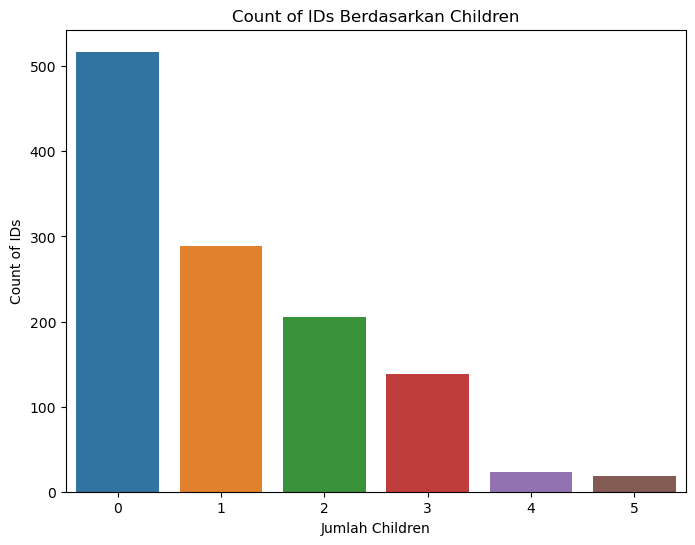

In [14]:
# --- Bar Chart: Jumlah ID vs Children ---
plt.figure(figsize=(8,6))
children_counts = df_cleaned['children'].value_counts().sort_index()
sns.barplot(x=children_counts.index, y=children_counts.values)
plt.xlabel('Jumlah Children')
plt.ylabel('Count of IDs')
plt.title('Count of IDs Berdasarkan Children')
plt.show()

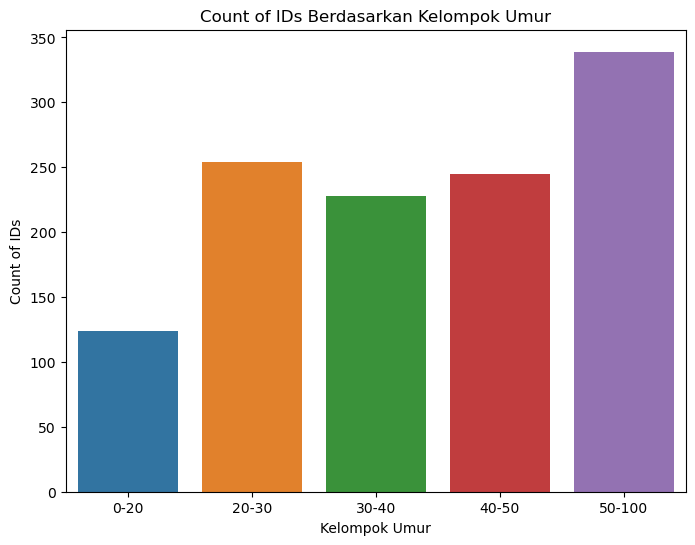

In [15]:
# --- Bar Chart: Jumlah ID vs Umur (Kelompok Umur) ---
# Meskipun instruksi menyebutkan kelompok umur: 0-20, 20-30, 40-50, 50-100,
# kami akan membuat pembagian dengan bins: [0,20,30,40,50,100] sehingga kelompok "30-40" juga muncul.
bins = [0, 20, 30, 40, 50, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-100']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=False)
age_group_counts = df_cleaned['age_group'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=age_group_counts.index.astype(str), y=age_group_counts.values)
plt.xlabel('Kelompok Umur')
plt.ylabel('Count of IDs')
plt.title('Count of IDs Berdasarkan Kelompok Umur')
plt.show()

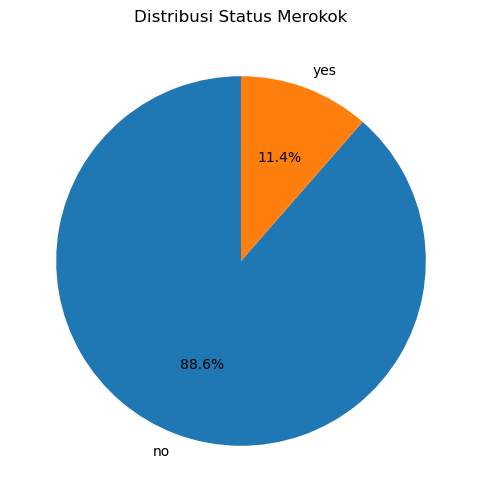

In [16]:
# --- Pie Chart: Persentase Status Merokok ---
plt.figure(figsize=(8,6))
smoker_counts = df_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Merokok')
plt.show()

In [17]:
# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.express as px

# # Membuat figure dengan Plotly Express
# fig_gender = px.pie(names=gender_counts.index, values=gender_counts.values, title='Distribusi Gender')
# fig_smoker = px.pie(names=smoker_counts.index, values=smoker_counts.values, title='Status Merokok')
# fig_children = px.bar(x=children_counts.index, y=children_counts.values, title='Count of IDs Berdasarkan Children')
# fig_age = px.bar(x=age_group_counts.index.astype(str), y=age_group_counts.values, title='Count of IDs Berdasarkan Kelompok Umur')

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Dashboard Data Insurance"),
    
#     html.Div([
#         html.Div([dcc.Graph(figure=fig_gender)], style={'width': '48%', 'display': 'inline-block'}),
#         html.Div([dcc.Graph(figure=fig_smoker)], style={'width': '48%', 'display': 'inline-block'})
#     ]),
    
#     html.Div([
#         html.Div([dcc.Graph(figure=fig_children)], style={'width': '48%', 'display': 'inline-block'}),
#         html.Div([dcc.Graph(figure=fig_age)], style={'width': '48%', 'display': 'inline-block'})
#     ]),
    
#     html.H2("Metrik-Metrik Utama"),
#     html.Ul([
#         html.Li(f"Total Unique ID: {total_unique_id}"),
#         html.Li(f"Total ID: {total_id}"),
#         html.Li(f"Total Charges: {total_charges:.2f}"),
#         html.Li(f"Highest Charges: {highest_charges:.2f}"),
#         html.Li(f"Average Charges: {average_charges:.2f}"),
#         html.Li(f"Average BMI: {average_bmi:.2f}"),
#         html.Li(f"Average Age: {average_age:.2f}")
#     ])
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
